In [35]:
import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pyts.image import GramianAngularField

### 1 Import accelerometry data and subjects' sequence number (ID)

In [36]:
physical_activity = np.load('../matrix_3d.npy')
subjects_seqn = pd.read_csv('../matrix_SEQN.csv')
train_ids = pd.read_csv('../train_IDs.csv', names=['SEQN'])
test_ids = pd.read_csv('../test_IDs.csv', names=['SEQN'])

In [37]:
physical_activity.shape # nof_subjects, 7 days, 1440 minutes

(7537, 7, 1440)

In [38]:
subjects_seqn.shape # nof_subjects

(7537, 1)

In [39]:
seqn_to_index = {seqn: idx for idx, seqn in enumerate(subjects_seqn['SEQN'].values)} # A dictionary to map SEQN to index

Would it be better to have physical_activity and subjects_seqn in a single data structure such as a dictionary or a class?

### 2 Functions

In [40]:
def create_gaf_image(one_day_acc):
    """
    This function creates a GAF image from the accelerometry data of a single day, for a single subject (input in a 2d numpy array).
    """
    gaf_model = GramianAngularField(method='difference')
    gaf = gaf_model.fit_transform(one_day_acc)

    return gaf

In [41]:
def plot_gaf_image(gaf_image):
    """
    This function plots a GAF image
    """
    fig_w=4; fig_h=4;# figure width and height
    plt.figure(figsize=(fig_w, fig_h))
    plt.imshow(gaf_image[0], cmap='rainbow', origin='lower')
    plt.axis('off')
    plt.show()

In [42]:
def save_gaf_to_jpg(gaf, title):
    """
    This function saves a GAF image to jpg
    """
    fig_w=4; fig_h=4;# figure width and height
    plt.figure(figsize=(fig_w, fig_h))
    plt.imshow(gaf[0], cmap='rainbow', origin='lower')
    plt.axis('off')
    plt.savefig(title, bbox_inches='tight',pad_inches = 0, dpi=100)
    plt.close()
    

### 3 Create GAF images for all subjects and days

In [43]:
nof_subjects = physical_activity.shape[0] # 7537 subjects
nof_days = physical_activity.shape[1] # 7 days
nof_minutes_per_day = physical_activity.shape[2] # 1440 minutes

In [44]:
# Process subjects in training set
#for seqn in train_ids['SEQN']:
for seqn in train_ids['SEQN'].head(1):    
    subject_idx = seqn_to_index[seqn]
    for day_idx in range(physical_activity.shape[1]):  # Assuming 7 days, you can use range(7) as well
        physical_activity_day = physical_activity[subject_idx, day_idx]
        gaf = create_gaf_image(physical_activity_day.reshape(1,nof_minutes_per_day)) # Reshape to 2D
        
        title = f'GAF_images/train_subject_{int(seqn)}_day_{day_idx}.jpg'
        save_gaf_to_jpg(gaf, title)

# Process subjects in test set
#for seqn in test_ids['SEQN']:
for seqn in test_ids['SEQN'].head(1):
    subject_idx = seqn_to_index[seqn]
    for day_idx in range(physical_activity.shape[1]):
        physical_activity_day = physical_activity[subject_idx, day_idx]
        gaf = create_gaf_image(physical_activity_day.reshape(1,nof_minutes_per_day)) # Reshape to 2D
        
        title = f'GAF_images/test_subject_{int(seqn)}_day_{day_idx}.jpg'
        save_gaf_to_jpg(gaf, title)

### Just checking how it looks

In [45]:
subject_idx = 100
day_idx = 0

In [46]:
physical_activity_day = physical_activity[subject_idx, day_idx]
gaf = create_gaf_image(physical_activity_day.reshape(1,nof_minutes_per_day)) # Reshape to 2D

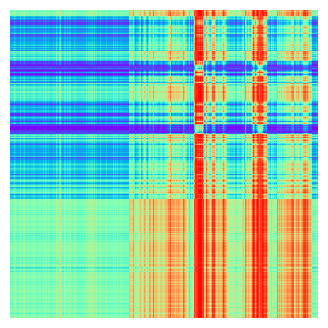

In [47]:
plot_gaf_image(gaf)


In [48]:
# Define a custom tick formatter to map minute of the day to time of day
def time_formatter(x, pos):
    """
    Formatter function to convert minute of the day to HH:MM format.
    """
    hours = int(x // 60)
    minutes = int(x % 60)
    return f"{hours:02d}:{minutes:02d}"

def plot_subject_day_data(subject_idx, day_idx, matrix_3d, matrix_SEQN):
    """
    Plot the acceleration data for a specific subject and day, showing the SEQN in the title.
    
    Args:
    - subject_idx (int): Index of the subject in the matrix.
    - day_idx (int): Index of the day in the matrix (0-based, i.e., 0=Monday, 6=Sunday).
    - matrix_3d (numpy array): The 3D matrix containing acceleration data.
    - matrix_SEQN (pandas Series): Series containing the SEQN identifiers.
    """
    
    # Extract data for the given subject and day
    data = matrix_3d[subject_idx, day_idx]
    
    # Get the SEQN for the subject
    subject_SEQN = matrix_SEQN.iloc[subject_idx].item()  # Using .item() to get the value
    
    # Plot
    day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

    plt.figure(figsize=(12, 6))
    plt.plot(data)
    plt.title(f"Acceleration Data for Subject SEQN {subject_SEQN}, Day {day_idx} - {day_names[day_idx]}")
    plt.xlabel("Time of the Day")
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(time_formatter))
    plt.ylabel("Acceleration (PAXMTSM)")
    plt.grid(True)
    plt.show()


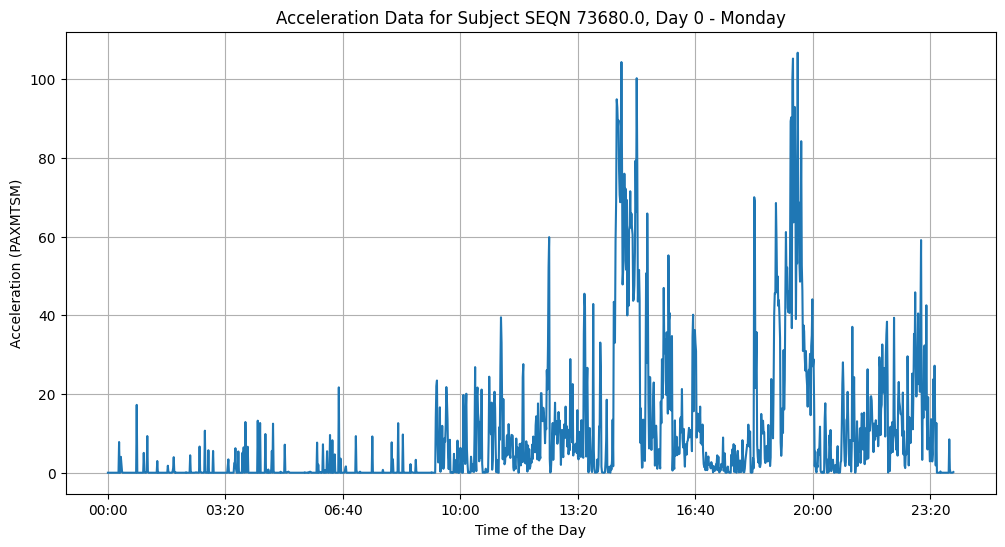

In [49]:
plot_subject_day_data(subject_idx, day_idx, physical_activity, subjects_seqn)